<a href="https://colab.research.google.com/github/AnnieMy28/mit_idss_ds/blob/main/wbMachine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
%matplotlib inline

In [ ]:
!pip install --quiet wbgapi
!pip install chart_studio
!pip install inequality

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 13.4 MB/s eta 0:00:00


In [ ]:
import plotly.graph_objects as go
import chart_studio
chart_studio.tools.set_credentials_file(username='econdata777', api_key='HERE')
import chart_studio.plotly as save2cs

import statsmodels.api as sm
import statsmodels.formula.api as smf

from scipy import stats
import inequality

import wbgapi as wb

In [ ]:
wb.source.info()

id,name,code,concepts,lastupdated
1,Doing Business,DBS,3,2021-08-18
2,World Development Indicators,WDI,3,2023-12-18
3,Worldwide Governance Indicators,WGI,3,2023-09-29
5,Subnational Malnutrition Database,SNM,3,2016-03-21
6,International Debt Statistics,IDS,4,2023-12-13
11,Africa Development Indicators,ADI,3,2013-02-22
12,Education Statistics,EDS,3,2023-10-12
13,Enterprise Surveys,ESY,3,2022-03-25
14,Gender Statistics,GDS,3,2024-01-03
15,Global Economic Monitor,GEM,3,2024-01-17


In [ ]:
wb.economy.info(wb.income.members('LMC'))

id,value,region,incomeLevel
DZA,Algeria,MEA,LMC
AGO,Angola,SSF,LMC
BGD,Bangladesh,SAS,LMC
BEN,Benin,SSF,LMC
BTN,Bhutan,SAS,LMC
BOL,Bolivia,LCN,LMC
CPV,Cabo Verde,SSF,LMC
KHM,Cambodia,EAS,LMC
CMR,Cameroon,SSF,LMC
COM,Comoros,SSF,LMC


In [ ]:
wb.series.metadata.get('NY.GDP.PCAP.CD')

Field,Value
Aggregationmethod,Weighted average
IndicatorName,GDP per capita (current US$)
License_Type,CC BY-4.0
License_URL,https://datacatalog.worldbank.org/public-licenses#cc-by
Longdefinition,GDP per capita is gross domestic product divided by midyear population. GDP is the sum of gross value added by all resident producers in the economy plus any product taxes and minus any subsidies not included in the value of the products. It is calculated without making deductions for depreciation of fabricated assets or for depletion and degradation of natural resources. Data are in current U.S. dollars.
Periodicity,Annual
Source,"World Bank national accounts data, and OECD National Accounts data files."
Statisticalconceptandmethodology,"For more information, see the metadata for current U.S. dollar GDP (NY.GDP.MKTP.CD) and total population (SP.POP.TOTL)."
Topic,Economic Policy & Debt: National accounts: US$ at current prices: Aggregate indicators


In [ ]:
wb.series.metadata.get('SE.XPD.TOTL.GD.ZS')

Field,Value
Aggregationmethod,Median
Developmentrelevance,The percentage of government expenditure on education to GDP is useful to compare education expenditure between countries and/or over time in relation to the size of their economy; A high percentage to GDP suggests a high priority for education and a capacity of raising revenues for public spending. Note that government expenditure appears lower in some countries where the private sector and/or households have a large share in total funding for education.
IndicatorName,"Government expenditure on education, total (% of GDP)"
License_Type,CC BY-4.0
License_URL,https://datacatalog.worldbank.org/public-licenses#cc-by
Limitationsandexceptions,Data may refer to spending by the ministry of education only (excluding spending on educational activities by other ministries).
Longdefinition,"General government expenditure on education (current, capital, and transfers) is expressed as a percentage of GDP. It includes expenditure funded by transfers from international sources to government. General government usually refers to local, regional and central governments."
Periodicity,Annual
Source,"UNESCO Institute for Statistics (UIS). UIS.Stat Bulk Data Download Service. Accessed September 19, 2023. https://apiportal.uis.unesco.org/bdds."
Statisticalconceptandmethodology,"Government expenditure on education, total (% of GDP) is calculated by dividing total government expenditure for all levels of education by the GDP, and multiplying by 100. Aggregate data are based on World Bank estimates. Data on education are collected by the UNESCO Institute for Statistics from official responses to its annual education survey. All the data are mapped to the International Standard Classification of Education (ISCED) to ensure the comparability of education programs at the international level. The current version was formally adopted by UNESCO Member States in 2011. GDP data come from the World Bank. The reference years reflect the school year for which the data are presented. In some countries the school year spans two calendar years (for example, from September 2010 to June 2011); in these cases the reference year refers to the year in which the school year ended (2011 in the example)."


In [ ]:
wb.series.metadata.get('SE.ADT.1524.LT.ZS')

Field,Value
Aggregationmethod,Weighted average
Developmentrelevance,"Literacy rate is an outcome indicator to evaluate educational attainment. This data can predict the quality of future labor force and can be used in ensuring policies for life skills for men and women. It can be also used as a proxy instrument to see the effectiveness of education system; a high literacy rate suggests the capacity of an education system to provide a large population with opportunities to acquire literacy skills. The accumulated achievement of education is fundamental for further intellectual growth and social and economic development, although it doesn't necessarily ensure the quality of education. Literate women implies that they can seek and use information for the betterment of the health, nutrition and education of their household members. Literate women are also empowered to play a meaningful role."
IndicatorName,"Literacy rate, youth total (% of people ages 15-24)"
License_Type,CC BY-4.0
License_URL,https://datacatalog.worldbank.org/public-licenses#cc-by
Limitationsandexceptions,"In practice, literacy is difficult to measure. Estimating literacy rates requires census or survey measurements under controlled conditions. Many countries report the number of literate people from self-reported data. Some use educational attainment data as a proxy but apply different lengths of school attendance or levels of completion. Ant there is a trend among recent national and international surveys toward using a direct reading test of literacy skills. Because definitions and methods of data collection differ across countries, data should be used cautiously."
Longdefinition,Youth literacy rate is the percentage of people ages 15-24 who can both read and write with understanding a short simple statement about their everyday life.
Periodicity,Annual
Source,"UNESCO Institute for Statistics (UIS). UIS.Stat Bulk Data Download Service. Accessed September 19, 2023. https://apiportal.uis.unesco.org/bdds."
Statisticalconceptandmethodology,"Literacy statistics for most countries cover the population ages 15 and older, but some include younger ages or are confined to age ranges that tend to inflate literacy rates. The youth literacy rate for ages 15-24 reflects recent progress in education. It measures the accumulated outcomes of primary education over the previous 10 years or so by indicating the proportion of the population who have passed through the primary education system and acquired basic literacy and numeracy skills. Generally, literacy also encompasses numeracy, the ability to make simple arithmetic calculations. Data on literacy are compiled by the UNESCO Institute for Statistics based on national censuses and household surveys and, for countries without recent literacy data, using the Global Age-Specific Literacy Projection Model (GALP). For detailed information, see www.uis.unesco.org."


In [ ]:
help(wb.data.DataFrame)

Help on function DataFrame in module wbgapi.data:

DataFrame(series, economy='all', time='all', index=None, columns=None, mrv=None, mrnev=None, skipBlanks=False, labels=False, skipAggs=False, numericTimeKeys=False, timeColumns=False, params={}, db=None, **dimensions)
    Retrieve a 2-dimensional pandas dataframe. 
    
    Arguments:
        series:             a series identifier or list-like, e.g., SP.POP.TOTL
    
        economy:            an economy identifier or list-like, e.g., 'BRA' or ['USA', 'CAN', 'MEX']
    
        time:               a time identifier or list-like, e.g., 'YR2015' or range(2010,2020).
                            Both element keys and values are acceptable
    
        index:              name or list of dimensions for the DataFrame's index, e.g., 'economy'. If None then the function
                            will define the index based on your request. Note: to get a dataframe with no index
                            (i.e., 0-based integers) call `rese

In [ ]:
wb.data.DataFrame('NY.GDP.PCAP.CD', time=range(2015,2020), labels=True)

,Country,YR2015,YR2016,YR2017,YR2018,YR2019
economy,,,,,,
ZWE,Zimbabwe,1410.329173,1421.787791,1192.107012,2269.177012,1421.868596
ZMB,Zambia,1307.909649,1249.923143,1495.752138,1475.199883,1268.120941
YEM,"Yemen, Rep.",1488.416267,1069.816997,893.716493,701.714868,693.816503
PSE,West Bank and Gaza,3272.154324,3527.613824,3620.360487,3562.330943,3656.858271
VIR,Virgin Islands (U.S.),34007.352941,35324.974887,35365.069304,36663.208755,38633.529892
...,...,...,...,...,...,...
CEB,Central Europe and the Baltics,12526.593008,12783.180837,14223.338676,16078.207265,16349.945827
CSS,Caribbean small states,10484.869963,9805.586748,10101.698337,10378.905763,10405.803209
ARB,Arab World,6287.314935,6117.871507,6230.762079,6579.417104,6504.789633


In [ ]:
wb.data.DataFrame('NY.GDP.PCAP.CD', mrnev=1, labels = True).join(wb.economy.DataFrame()['incomeLevel'])

,Country,NY.GDP.PCAP.CD,incomeLevel
economy,,,
AFE,Africa Eastern and Southern,1644.062829,
AFW,Africa Western and Central,1785.312219,
ARB,Arab World,7625.252464,
CSS,Caribbean small states,12639.704623,
CEB,Central Europe and the Baltics,19420.583779,
...,...,...,...
VIR,Virgin Islands (U.S.),41976.008312,HIC
PSE,West Bank and Gaza,3789.327966,UMC
YEM,"Yemen, Rep.",650.272218,LIC


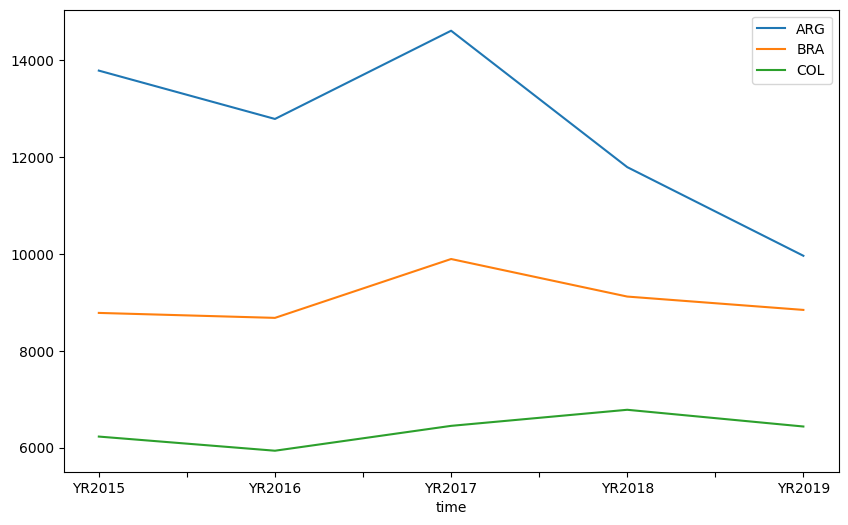

In [ ]:
wb.data.DataFrame('NY.GDP.PCAP.CD', ['BRA', 'ARG', 'COL'], range(2015, 2020), index='time').plot(figsize=(10, 6))
plt.show()

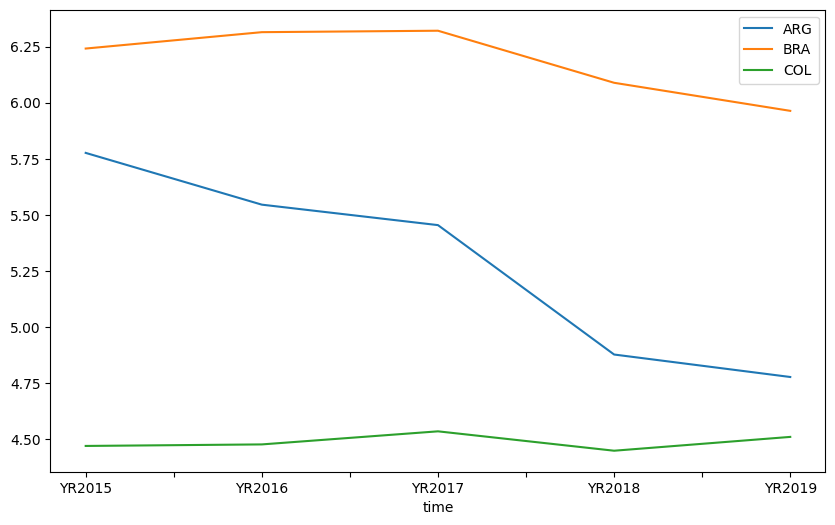

In [ ]:
wb.data.DataFrame('SE.XPD.TOTL.GD.ZS', ['BRA', 'ARG', 'COL'], range(2015, 2020), index='time').plot(figsize=(10, 6))
plt.show()

In [ ]:
wb.data.DataFrame('NY.GDP.PCAP.CD').head(10)

,YR1960,YR1961,YR1962,YR1963,YR1964,YR1965,YR1966,YR1967,YR1968,YR1969,...,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019,YR2020,YR2021,YR2022
economy,,,,,,,,,,,,,,,,,,,,,
ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,26514.868980,26940.264114,28419.264534,28449.712946,29329.081747,30918.483584,31902.809818,24008.127822,29127.759384,33300.838819
AFE,141.385955,144.342434,148.774835,157.047580,166.849791,177.769086,186.630486,199.559835,210.078097,229.711026,...,1736.849038,1725.332959,1554.167299,1444.003514,1625.286236,1558.307482,1507.982881,1355.805923,1545.613215,1644.062829
AFG,62.369375,62.443703,60.950364,82.021738,85.511073,105.243196,143.103233,167.165675,134.012768,134.250360,...,638.733185,626.512930,566.881133,523.053012,526.140801,492.090632,497.741429,512.055098,355.777826,NaN
AFW,107.053706,112.128417,117.814663,122.370114,130.700278,137.301801,143.012562,127.325268,128.366811,142.327523,...,2154.150832,2248.316255,1882.264038,1648.762676,1590.277754,1735.374911,1812.446822,1688.075575,1766.943618,1785.312219
AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5061.349240,5011.984412,3217.339244,1809.709377,2439.374441,2540.508878,2191.347764,1450.905112,1927.474078,3000.444231
ALB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4413.063383,4578.633208,3952.803574,4124.055390,4531.032207,5287.660801,5396.214243,5343.037704,6377.203096,6810.114041
AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,44747.761156,45680.546941,38885.548589,39931.236264,40632.208982,42904.811588,41328.612393,37207.238871,42072.319423,41992.772778
ARB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,303.318415,321.260879,...,7352.085717,7306.051166,6287.314935,6117.871507,6230.762079,6579.417104,6504.789633,5644.142570,6419.161029,7625.252464
ARE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,45729.607676,46865.964598,41525.138903,41054.539570,43063.967477,46722.268718,45376.170838,37629.174169,44332.340051,53707.980081


In [ ]:
wb.data.DataFrame('SE.ADT.1524.LT.ZS',mrnev=1,labels=True).sort_values('SE.ADT.1524.LT.ZS',ascending=False).head(10)

,Country,SE.ADT.1524.LT.ZS
economy,,
BRB,Barbados,100.000000
BHR,Bahrain,100.000000
KOR,"Korea, Rep.",100.000000
UZB,Uzbekistan,99.999908
PRK,"Korea, Dem. People's Rep.",99.999641
SRB,Serbia,99.999443
EST,Estonia,99.989998
LCA,St. Lucia,99.980003
LTU,Lithuania,99.949997


In [ ]:
wb.data.DataFrame('NY.GDP.PCAP.CD',mrnev=1,labels=True).sort_values('NY.GDP.PCAP.CD',ascending=False).head(10)

,Country,NY.GDP.PCAP.CD
economy,,
MCO,Monaco,240862.182448
LIE,Liechtenstein,197504.548936
LUX,Luxembourg,125006.021815
BMU,Bermuda,118774.790657
NOR,Norway,106177.197179
IRL,Ireland,103983.291336
CYM,Cayman Islands,99624.885444
CHE,Switzerland,93259.905718
QAT,Qatar,87661.450146


In [ ]:
wb.data.DataFrame('SE.XPD.TOTL.GD.ZS',mrnev=1,labels=True).sort_values('SE.XPD.TOTL.GD.ZS',ascending=False).head(10)

,Country,SE.XPD.TOTL.GD.ZS
economy,,
KIR,Kiribati,15.585125
ASM,American Samoa,14.717050
CUB,Cuba,11.524796
FSM,"Micronesia, Fed. Sts.",10.539216
NAM,Namibia,9.358892
BOL,Bolivia,8.437110
NRU,Nauru,8.325758
BTN,Bhutan,8.141788
BWA,Botswana,8.058336


In [ ]:
wb.data.DataFrame('SE.XPD.TOTL.GD.ZS',mrnev=1,labels=True).sort_values('SE.XPD.TOTL.GD.ZS',ascending=False).head(10)

,Country,SE.XPD.TOTL.GD.ZS
economy,,
KIR,Kiribati,15.585125
ASM,American Samoa,14.717050
CUB,Cuba,11.524796
FSM,"Micronesia, Fed. Sts.",10.539216
NAM,Namibia,9.358892
BOL,Bolivia,8.437110
NRU,Nauru,8.325758
BTN,Bhutan,8.141788
BWA,Botswana,8.058336


In [ ]:
wb.data.DataFrame('SE.ADT.1524.LT.ZS',time=range(2015, 2020)).dropna()

,YR2015,YR2016,YR2017,YR2018,YR2019
economy,,,,,
AFE,80.648651,81.253433,81.632019,81.925377,82.461998
AFW,67.169121,67.622658,68.720016,70.955078,70.704674
ARB,85.974159,88.323921,88.947571,85.323738,85.662750
BGD,87.888771,92.242653,92.950760,93.296440,94.862427
BOL,99.400002,99.419998,99.379997,99.570000,99.529999
BRA,98.959999,99.070000,99.139999,99.040001,99.099998
CEB,99.508812,99.528252,99.538818,99.546730,99.552391
COL,98.529999,98.669998,98.669998,98.849998,98.830002
DOM,98.120003,98.480003,98.099998,98.540001,98.699997


In [ ]:
wb.data.DataFrame('NY.GDP.PCAP.CD',time=range(2015, 2020)).dropna()

,YR2015,YR2016,YR2017,YR2018,YR2019
economy,,,,,
ABW,28419.264534,28449.712946,29329.081747,30918.483584,31902.809818
AFE,1554.167299,1444.003514,1625.286236,1558.307482,1507.982881
AFG,566.881133,523.053012,526.140801,492.090632,497.741429
AFW,1882.264038,1648.762676,1590.277754,1735.374911,1812.446822
AGO,3217.339244,1809.709377,2439.374441,2540.508878,2191.347764
...,...,...,...,...,...
XKX,3520.782075,3759.472855,4009.353811,4384.188680,4416.029253
YEM,1488.416267,1069.816997,893.716493,701.714868,693.816503
ZAF,6204.929901,5735.066787,6734.475153,7067.724165,6702.526617


In [ ]:
wb.data.DataFrame('SE.XPD.TOTL.GD.ZS',time=range(2015, 2020)).dropna()

,YR2015,YR2016,YR2017,YR2018,YR2019
economy,,,,,
AFE,4.743500,4.692000,4.820445,4.739750,4.541950
AFW,3.195421,2.899100,3.535590,3.071543,3.100235
AGO,3.100000,2.754937,2.466879,2.044701,2.073064
ALB,3.437970,3.962090,3.611720,3.152945,3.916240
AND,3.280350,3.237070,3.217090,3.246720,3.150610
...,...,...,...,...,...
VNM,3.416604,3.469070,3.418657,3.295370,3.084998
WLD,4.284570,4.225440,4.255959,4.111814,4.186856
WSM,4.615190,4.349684,3.962319,4.260974,4.395817


In [ ]:
# Import GDP per capita and youth literacy rate / expenditure on education % gdp
df = wb.data.DataFrame(['NY.GDP.PCAP.CD', 'SE.XPD.TOTL.GD.ZS','SE.ADT.1524.LT.ZS'],
                                time=range(2015, 2020),
                                labels=True,
                                skipAggs=True,
                                skipBlanks=True,
                                columns='series').reset_index()
df

,economy,time,Country,Time,NY.GDP.PCAP.CD,SE.ADT.1524.LT.ZS,SE.XPD.TOTL.GD.ZS
0,ZWE,YR2019,Zimbabwe,2019,1421.868596,83.720001,NaN
1,ZWE,YR2018,Zimbabwe,2018,2269.177012,NaN,2.05049
2,ZWE,YR2017,Zimbabwe,2017,1192.107012,NaN,5.81878
3,ZWE,YR2016,Zimbabwe,2016,1421.787791,NaN,NaN
4,ZWE,YR2015,Zimbabwe,2015,1410.329173,NaN,NaN
...,...,...,...,...,...,...,...
1057,VEN,YR2016,"Venezuela, RB",2016,NaN,98.759506,NaN
1058,VEN,YR2015,"Venezuela, RB",2015,NaN,99.007629,NaN
1059,SSD,YR2018,South Sudan,2018,NaN,47.900959,NaN
1060,PRK,YR2018,"Korea, Dem. People's Rep.",2018,NaN,99.999641,NaN


In [ ]:
import plotly.express as px

In [ ]:
px.scatter(df.query("Time == '2015'"),
           x="SE.XPD.TOTL.GD.ZS",
           y="NY.GDP.PCAP.CD",
           log_y = True, # log scale for the y axis
           trendline="ols", trendline_options=dict(log_y=True),  trendline_color_override="red",
           #color="region",
           #size="pop", size_max=60,
           hover_name="Country",
           labels={"SE.XPD.TOTL.GD.ZS": "government expenditure on education to GDP",
                   "NY.GDP.PCAP.CD": "GDP per capita"
                   }
           )

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1062 entries, 0 to 1061
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   economy            1062 non-null   object 
 1   time               1062 non-null   object 
 2   Country            1062 non-null   object 
 3   Time               1062 non-null   object 
 4   NY.GDP.PCAP.CD     1051 non-null   float64
 5   SE.ADT.1524.LT.ZS  200 non-null    float64
 6   SE.XPD.TOTL.GD.ZS  822 non-null    float64
dtypes: float64(3), object(4)
memory usage: 58.2+ KB


In [ ]:
df.nunique()

economy               216
time                    5
Country               216
Time                    5
NY.GDP.PCAP.CD       1051
SE.ADT.1524.LT.ZS     194
SE.XPD.TOTL.GD.ZS     821
dtype: int64

In [ ]:
df = df.dropna()
df


,economy,time,Country,Time,NY.GDP.PCAP.CD,SE.ADT.1524.LT.ZS,SE.XPD.TOTL.GD.ZS
17,PSE,YR2017,West Bank and Gaza,2017,3620.360487,99.311768,4.721540
18,PSE,YR2016,West Bank and Gaza,2016,3527.613824,99.377487,4.982960
19,PSE,YR2015,West Bank and Gaza,2015,3272.154324,99.341537,4.663220
25,VNM,YR2019,Viet Nam,2019,3491.091410,98.625458,3.084998
35,UZB,YR2019,Uzbekistan,2019,1795.201768,99.999924,6.295347
...,...,...,...,...,...,...,...
1009,ARM,YR2016,Armenia,2016,3679.952347,99.847397,2.758120
1036,DZA,YR2019,Algeria,2019,4021.983266,74.029999,6.036907
1037,DZA,YR2018,Algeria,2018,4171.790388,97.426521,6.324539
1043,ALB,YR2017,Albania,2017,4531.032207,99.580002,3.611720


In [ ]:
df.drop(columns='time',inplace=True)

<ipython-input-28-88a335a11ae6>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df.to_csv('education_gdp.csv', index=False)


In [ ]:
! ls

education_gdp.csv  sample_data


In [ ]:

! cat education_gdp.csv

economy,Country,Time,NY.GDP.PCAP.CD,SE.ADT.1524.LT.ZS,SE.XPD.TOTL.GD.ZS
PSE,West Bank and Gaza,2017,3620.36048715937,99.311767578125,4.72153997421265
PSE,West Bank and Gaza,2016,3527.61382413178,99.3774871826172,4.98296022415161
PSE,West Bank and Gaza,2015,3272.15432360708,99.3415374755859,4.66321992874146
VNM,Viet Nam,2019,3491.09140990663,98.6254577636719,3.08499836921692
UZB,Uzbekistan,2019,1795.20176845657,99.9999237060547,6.29534673690796
UZB,Uzbekistan,2018,1604.25864156544,99.9999389648438,4.83589315414429
UZB,Uzbekistan,2016,2704.67718852896,99.9999313354492,5.41523742675781
UZB,Uzbekistan,2015,2753.97105782901,99.9999618530273,5.49453353881836
URY,Uruguay,2019,18098.361548609,99.0199966430664,4.64130020141602
URY,Uruguay,2018,19026.0498173005,98.870002746582,4.61359977722168
URY,Uruguay,2017,18995.3970195554,98.9300003051758,4.41787004470825
URY,Uruguay,2016,16837.9403803049,99.1500015258789,4.36420011520386
URY,Uruguay,2015,16950.7531694816,98.9300003051758,4.20636987686157
A

In [ ]:
df = pd.read_csv('education_gdp.csv')

In [ ]:
df.head(10)

,economy,Country,NY.GDP.PCAP.CD,SE.ADT.1524.LT.ZS,SE.XPD.TOTL.GD.ZS
0,PSE,West Bank and Gaza,3620.360487,99.311768,4.721540
1,PSE,West Bank and Gaza,3527.613824,99.377487,4.982960
2,PSE,West Bank and Gaza,3272.154324,99.341537,4.663220
3,VNM,Viet Nam,3491.091410,98.625458,3.084998
4,UZB,Uzbekistan,1795.201768,99.999924,6.295347
5,UZB,Uzbekistan,1604.258642,99.999939,4.835893
6,UZB,Uzbekistan,2704.677189,99.999931,5.415237
7,UZB,Uzbekistan,2753.971058,99.999962,5.494534
8,URY,Uruguay,18098.361549,99.019997,4.641300
9,URY,Uruguay,19026.049817,98.870003,4.613600


In [ ]:
df.describe()

,NY.GDP.PCAP.CD,SE.ADT.1524.LT.ZS,SE.XPD.TOTL.GD.ZS
count,173.000000,173.000000,173.000000
mean,7923.309330,90.992235,4.049575
std,12467.130340,15.557495,1.442084
min,244.145422,20.760000,1.387760
25%,1604.258642,90.330002,3.030330
50%,4145.862351,98.480003,3.860210
75%,7417.206608,99.341537,4.806220
max,71919.054919,100.000000,8.150610


In [ ]:
corr = df.corr()
corr

<ipython-input-57-4381f08f6434>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,NY.GDP.PCAP.CD,SE.ADT.1524.LT.ZS,SE.XPD.TOTL.GD.ZS
NY.GDP.PCAP.CD,1.000000,0.291062,-0.082073
SE.ADT.1524.LT.ZS,0.291062,1.000000,0.197141
SE.XPD.TOTL.GD.ZS,-0.082073,0.197141,1.000000


<Axes: >

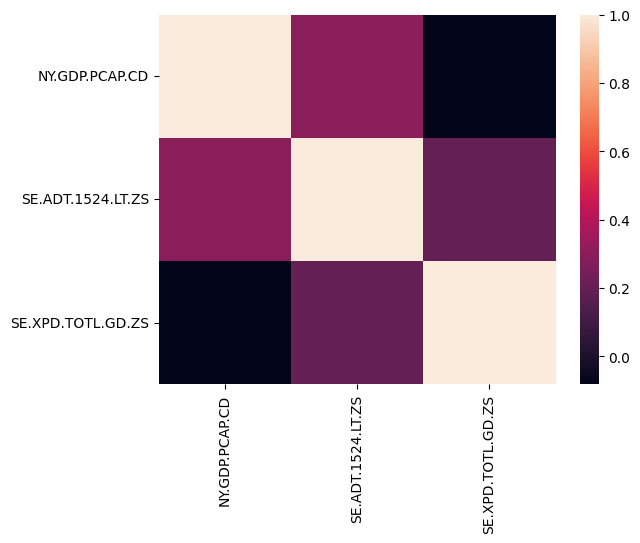

In [ ]:
import seaborn as sns
sns.heatmap(corr)

## **Show specific data types in dataframe**

In [ ]:
df.select_dtypes(include=['number'])

,NY.GDP.PCAP.CD,SE.ADT.1524.LT.ZS,SE.XPD.TOTL.GD.ZS
0,3620.360487,99.311768,4.721540
1,3527.613824,99.377487,4.982960
2,3272.154324,99.341537,4.663220
3,3491.091410,98.625458,3.084998
4,1795.201768,99.999924,6.295347
...,...,...,...
168,3679.952347,99.847397,2.758120
169,4021.983266,74.029999,6.036907
170,4171.790388,97.426521,6.324539
171,4531.032207,99.580002,3.611720


In [ ]:

df.select_dtypes(include=['object'])


,economy,Country
0,PSE,West Bank and Gaza
1,PSE,West Bank and Gaza
2,PSE,West Bank and Gaza
3,VNM,Viet Nam
4,UZB,Uzbekistan
...,...,...
168,ARM,Armenia
169,DZA,Algeria
170,DZA,Algeria
171,ALB,Albania


In [ ]:
df.head()

,economy,Country,NY.GDP.PCAP.CD,SE.ADT.1524.LT.ZS,SE.XPD.TOTL.GD.ZS
0,PSE,West Bank and Gaza,3620.360487,99.311768,4.721540
1,PSE,West Bank and Gaza,3527.613824,99.377487,4.982960
2,PSE,West Bank and Gaza,3272.154324,99.341537,4.663220
3,VNM,Viet Nam,3491.091410,98.625458,3.084998
4,UZB,Uzbekistan,1795.201768,99.999924,6.295347


In [ ]:
df=df.drop(['economy','Country'], axis = 1)
df

,NY.GDP.PCAP.CD,SE.ADT.1524.LT.ZS,SE.XPD.TOTL.GD.ZS
0,3620.360487,99.311768,4.721540
1,3527.613824,99.377487,4.982960
2,3272.154324,99.341537,4.663220
3,3491.091410,98.625458,3.084998
4,1795.201768,99.999924,6.295347
...,...,...,...
168,3679.952347,99.847397,2.758120
169,4021.983266,74.029999,6.036907
170,4171.790388,97.426521,6.324539
171,4531.032207,99.580002,3.611720


In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn import decomposition

scaler = StandardScaler()

In [ ]:
df_scaled = scaler.fit_transform(df)
df_scaled

array([[-3.46145357e-01,  5.36312743e-01,  4.67320230e-01],
       [-3.53606247e-01,  5.40549311e-01,  6.49125882e-01],
       [-3.74156368e-01,  5.38231838e-01,  4.26761344e-01],
       [-3.56544247e-01,  4.92070272e-01, -6.70818509e-01],
       [-4.92967976e-01,  5.80674236e-01,  1.56182980e+00],
       [-5.08328158e-01,  5.80675219e-01,  5.46847559e-01],
       [-4.19806359e-01,  5.80674728e-01,  9.49754615e-01],
       [-4.15840975e-01,  5.80676695e-01,  1.00490138e+00],
       [ 8.18519396e-01,  5.17503939e-01,  4.11517191e-01],
       [ 8.93146122e-01,  5.07834690e-01,  3.92252832e-01],
       [ 8.90680296e-01,  5.11702389e-01,  2.56131886e-01],
       [ 7.17126385e-01,  5.25884611e-01,  2.18806941e-01],
       [ 7.26201470e-01,  5.11702389e-01,  1.09043335e-01],
       [ 3.01284877e+00,  4.75534676e-01, -1.31694836e-01],
       [-5.73578545e-01, -1.02880206e-01, -1.33461385e+00],
       [ 1.03943912e-01,  5.74693662e-01,  2.81279483e-01],
       [ 2.23009462e-01,  5.64619151e-01

In [ ]:
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

In [ ]:
df_scaled

,NY.GDP.PCAP.CD,SE.ADT.1524.LT.ZS,SE.XPD.TOTL.GD.ZS
0,-0.346145,0.536313,0.467320
1,-0.353606,0.540549,0.649126
2,-0.374156,0.538232,0.426761
3,-0.356544,0.492070,-0.670819
4,-0.492968,0.580674,1.561830
...,...,...,...
168,-0.341352,0.570842,-0.898147
169,-0.313837,-1.093458,1.382097
170,-0.301786,0.414782,1.582132
171,-0.272888,0.553604,-0.304508


In [ ]:
from sklearn.decomposition import PCA
pca = PCA()

In [ ]:
pc_df = pca.fit_transform(df_scaled)

In [ ]:
pc_df = pd.DataFrame(data=pc_df)
pc_df

,0,1,2
0,-0.331372,-0.628753,-0.347416
1,-0.385392,-0.785092,-0.271476
2,-0.303634,-0.610209,-0.383749
3,0.054177,0.320735,-0.844659
4,-0.609391,-1.626891,0.037165
...,...,...,...
168,0.056013,0.511403,-0.992159
169,0.576350,-1.220671,1.175636
170,-0.607558,-1.524617,0.269586
171,-0.153085,0.054112,-0.668810


In [ ]:
var = pca.explained_variance_ratio_
var

array([0.43907167, 0.35852998, 0.20239835])

In [ ]:
max(var)

0.4390716707663973

In [ ]:
var.min()

0.2023983481395281

In [ ]:
sum(var)

0.9999999999999999

In [ ]:
sum(sorted(var, reverse=True)[:6])*100

99.99999999999999

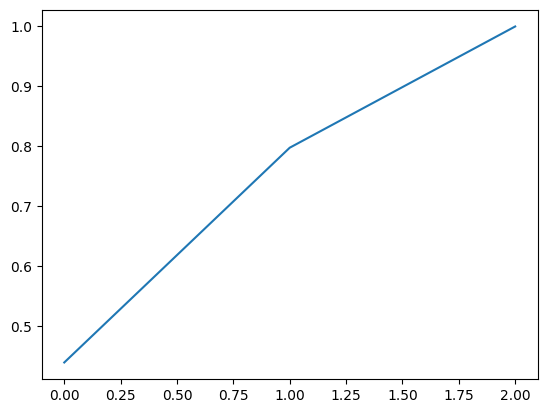

In [ ]:
plt.plot(np.cumsum(var))
plt.show()

In [ ]:
pca3 = PCA(n_components=3)

In [ ]:
pd.DataFrame (pca3.fit_transform(df_scaled), columns=['pc1', 'pc2','pc3'])

,pc1,pc2,pc3
0,-0.331372,-0.628753,-0.347416
1,-0.385392,-0.785092,-0.271476
2,-0.303634,-0.610209,-0.383749
3,0.054177,0.320735,-0.844659
4,-0.609391,-1.626891,0.037165
...,...,...,...
168,0.056013,0.511403,-0.992159
169,0.576350,-1.220671,1.175636
170,-0.607558,-1.524617,0.269586
171,-0.153085,0.054112,-0.668810
